## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import numpy as np # for the calculations in the data
import seaborn as sns 
#for visualization purposes
import matplotlib.pyplot as plt
%matplotlib inline


           # #DATA CLEANING bom.movie_gross

In [9]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
data = pd.read_csv("data/bom.movie_gross.csv")
data


FileNotFoundError: [Errno 2] No such file or directory: 'data/bom.movie_gross.csv'

In [ ]:
data.groupby("studio").max()# lets try to group our data by the studios and find the minimum values

NameError: name 'data' is not defined

In [ ]:
#to find duplicated data in the dataset
data.duplicated().value_counts()

False    3387
dtype: int64

In [ ]:
#to find the missing values in the dataset
data.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [ ]:
#to find the sum of all the missing values
data.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


#dropping the column foreign_gross that has a lot of missing data since it has more tha 50% of the missing and data and so we cannot move forward such large numbers of missing data

In [ ]:
data.drop("foreign_gross",axis = 1, inplace=True )
 

In [ ]:
data

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


## The row with missing value foreign gross has been eliminated

In [ ]:
 # to get information about the data after dropping the row with missing values
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


#There are also few null data in the domestic_gross.A better way is by replacing it with the median since it has categorical values and  does not affect the distribution.we can not drop the whole column

In [ ]:
data['domestic_gross'].fillna(data['domestic_gross'].median(), inplace = True)

In [ ]:
data

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


#lets replace the missing values in the studio column with the mode

In [ ]:
mode_studio = data["studio"].mode()
data["studio"].fillna(mode_studio,inplace = True)

In [ ]:
data

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [ ]:
data.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [ ]:
data.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

the data is now clean with no null values  and ready for  analysis

       #DATA CLEANING IN im.db database

In [ ]:
import sqlite3 # this is to import  the SQL database 
conn = sqlite3.connect("data/im.db")#this is loading the database

In [ ]:
#from the sql data base acess the movie basics
im_df = pd.read_sql("""
                    SELECT * FROM
                    movie_basics
                    
                    """,conn)

In [ ]:
im_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [ ]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
im_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

#since runtime_minutes column contain alot of missing data.It would be a better option to drop the whole column


In [ ]:
 # From the data base access how the movies are being  rated
imdf=pd.read_sql("""
                    SELECT * FROM
                    movie_ratings
                 ORDER BY numvotes DESC;
                    """,conn)

In [ ]:
imdf

,movie_id,averagerating,numvotes
0,tt1375666,8.8,1841066
1,tt1345836,8.4,1387769
2,tt0816692,8.6,1299334
3,tt1853728,8.4,1211405
4,tt0848228,8.1,1183655
...,...,...,...
73851,tt8420530,6.8,5
73852,tt8747790,4.6,5
73853,tt9367004,8.2,5
73854,tt9647642,2.0,5


In [ ]:
imdf.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

 ##We notice the movie with ttt1375666 movie_id had the most number of votes counted

#lets join the movie_basics table with the movie ratings using movie_id as the primary key and order by the numvotes column in a descending 
manner to give a view of both movie basics and movie ratings

In [ ]:
joined_table=pd.read_sql("""
                    SELECT * FROM
                    movie_ratings
                    JOIN movie_basics
                      USING(movie_id)
                      ORDER BY numvotes DESC;
                    """,conn)

In [ ]:
joined_table

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
1,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
2,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
3,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
4,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
73851,tt8420530,6.8,5,Tia and Piujuq,Tia and Piujuq,2018,80.0,Family
73852,tt8747790,4.6,5,A Monks Madness,A Monks Madness,2018,NaN,Action
73853,tt9367004,8.2,5,Up to the Last Drop: The Secret Water War in E...,Mehri tin teleftaia stagona: O mystikos polemo...,2017,58.0,Documentary
73854,tt9647642,2.0,5,The Confederate,The Confederate,2018,99.0,History


In [ ]:
joined_table.isna().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [ ]:
joined_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [ ]:
joined_table["genres"].mode()[0]

'Drama'

we replace the missing values in genre with mode

In [ ]:
mode_joined_table = joined_table["genres"].mode()[0]

joined_table["genres"].fillna("mode_joined_table",inplace = True)

In [ ]:
joined_table.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73856 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


we still have missing values in runtime minutes,we will have to replace the runtime with mean

In [ ]:
mean_joined_table = joined_table["runtime_minutes"].mean()
joined_table["runtime_minutes"].fillna("mean_joined_table",inplace = True)

In [ ]:
joined_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  73856 non-null  object 
 7   genres           73856 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.5+ MB


The data is now clean and ready for analysis

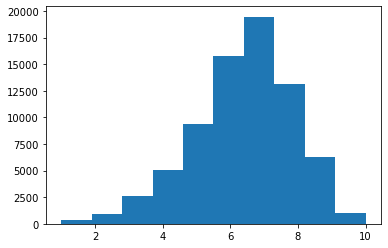

In [ ]:
plt.hist(joined_table["averagerating"], bins = 10);

from the histogram we can tell most movies are rated averagely between 6 to 8

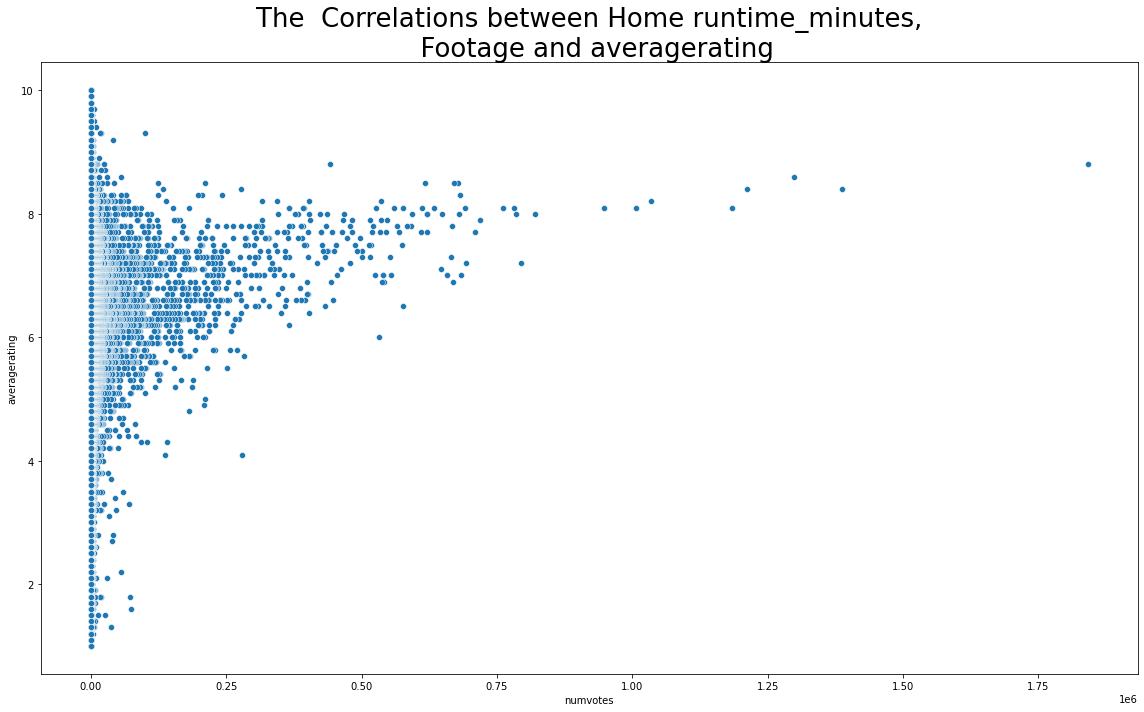

In [ ]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='numvotes', y='averagerating', data = joined_table)
plt.title("The  Correlations between Home runtime_minutes,\n  Footage and averagerating", fontsize=26)
plt.tight_layout()
plt.show() 


#the movie with id tt5390098 has been found to have the highest averagerating compared to the others but with less number of votes.
movie with id tt1375666	has been found to have the higest number of votes is of action,adventure and sci_fi genre.its original title is inception ,it started in the year 2010 and it had a running time of 148 minutes.






        #DATA CLEANING IN tn_movie_bugget csv

In [ ]:
frame = pd.read_csv("data/tn.movie_budgets.csv")
frame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [ ]:
frame.info()#to find all the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#the domestic_gross,worldwide_gross and production_budget are all objects.We cannot work with currencies as float,we need to convert them to intergers or float
#we will opt for using floats since we are not sure if they are all intergers
 #remove dollar signs and commas from Salary column

 

In [ ]:
frame['production_budget'] = frame['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
frame['domestic_gross'] = frame['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
frame['worldwide_gross'] = frame['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)



# Verify that the column is now a float data type
print(frame.dtypes)

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


In [ ]:
frame.head()#to find the first five elements

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


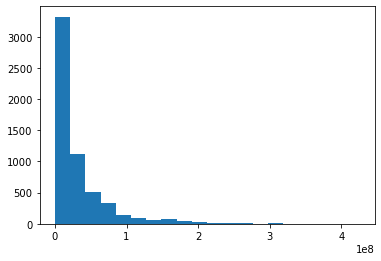

In [ ]:
plt.hist(frame['production_budget'],bins = 20);

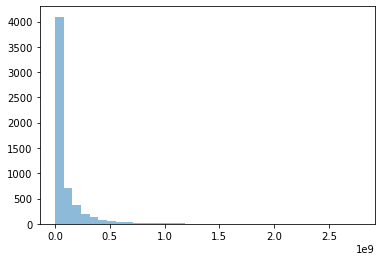

In [ ]:
plt.hist(frame['worldwide_gross'],bins = 35 ,density= False , alpha = 0.5);

  #correlation

In [ ]:
frame["production_budget"].corr(frame["domestic_gross"])


0.6856818396752733

In [ ]:
frame["production_budget"].corr(frame["worldwide_gross"])

0.7483059765694753

In [ ]:
correlation_pr_dm = round(frame['production_budget'].corr(frame['domestic_gross']),4)*100
print("The correlation between production budget and domestic revenue is :", correlation_pr_dm,"%")

The correlation between production budget and domestic revenue is : 68.57 %


In [ ]:
correlation_pr_ww = round(frame['production_budget'].corr(frame['worldwide_gross']), 4)*100
print("The correlation between production budget and worldwide revenue is :", correlation_pr_ww, "%")

The correlation between production budget and worldwide revenue is : 74.83 %


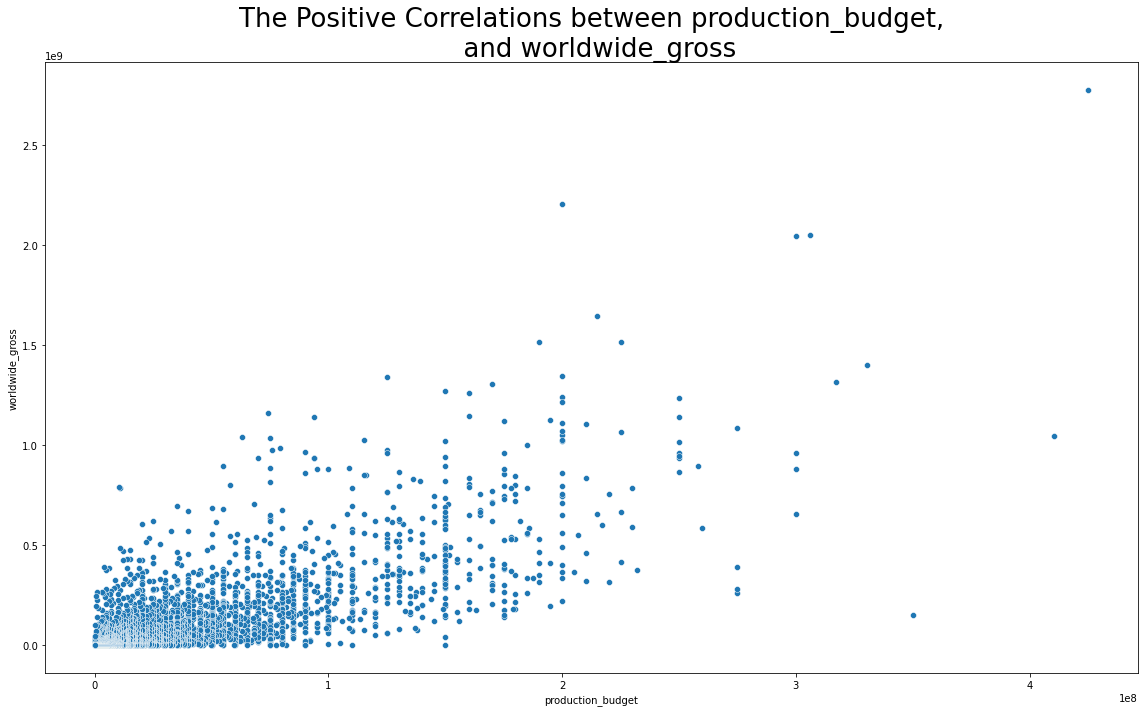

In [ ]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='worldwide_gross', data = frame,)
plt.title("The Positive Correlations between production_budget,\n  and worldwide_gross", fontsize=26)
plt.tight_layout()
plt.show() 


In [ ]:
frame.isna()# to find if there are missing data in the data set

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5777,False,False,False,False,False,False
5778,False,False,False,False,False,False
5779,False,False,False,False,False,False
5780,False,False,False,False,False,False


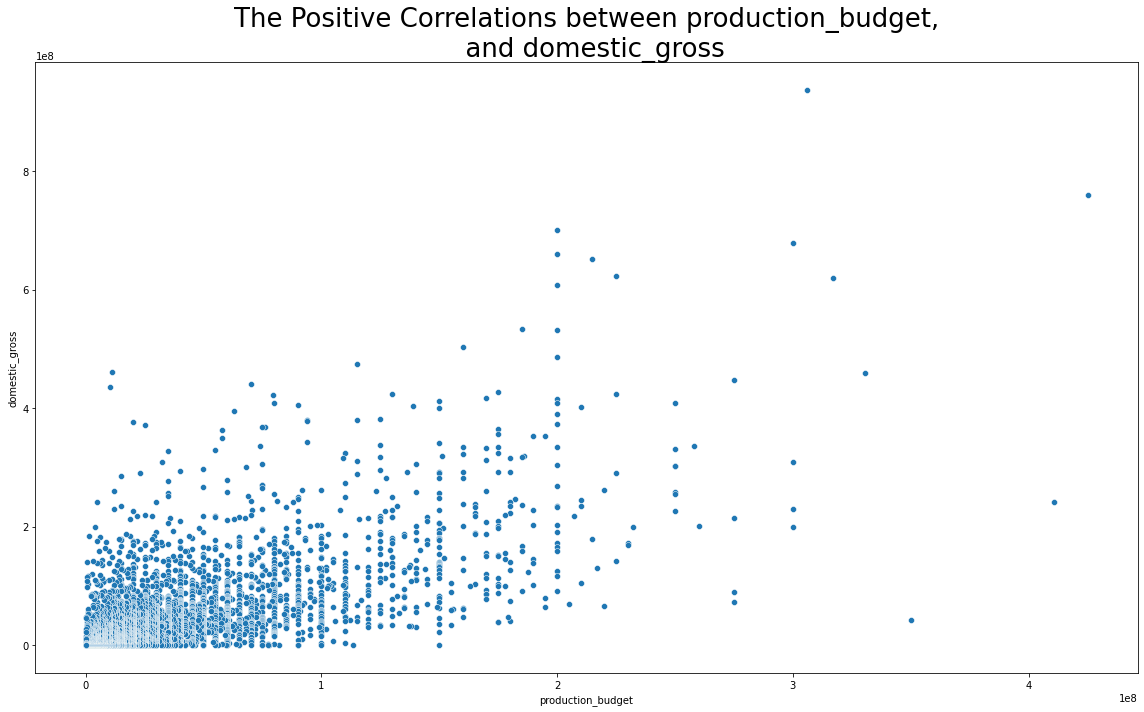

In [ ]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='domestic_gross', data = frame,)
plt.title("The Positive Correlations between production_budget,\n  and domestic_gross", fontsize=26)
plt.tight_layout()
plt.show() 


##   ANALYSIS

There is a higher positive correlation between production_budget and worldwide_gross compared to the positive correlation between production budget ad domestic grosss.This is well shown when using a scatter plot
This  brings into sence that a movie is best rated and entirely watched worldwide compared to it being watched domestically. hence  a company makes more profit worldwide compared to domestically

In [ ]:
frame.isna().sum()#to get the total number of misssing values

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

since there are no missing values,the data is cleaned and ready to be used for analysis.

#we find there are some movies that makes more sales worldwide than domestic sales and thus higher profits compared to the production costs
#some movies undergo loses since there are no sales domestically and worldwide when they are produced.


## DATACLEANING IN rt.movie_info NOT NECESSARY

In [ ]:
movie_info = pd.read_csv("data/rt.movie_info.tsv",delimiter ="\t" )
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [ ]:
movie_info.info()#to find information about  the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [ ]:
movie_info.isna().any()#to find if there are any missing values

id              False
synopsis         True
rating           True
genre            True
director         True
writer           True
theater_date     True
dvd_date         True
currency         True
box_office       True
runtime          True
studio           True
dtype: bool

In [ ]:
movie_info.isna().sum()#to find the sum of missing values

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [ ]:
#We drop currency, box_office, studio columns since there are lots of missing values
movie_info.drop(['currency','box_office','studio'], axis=1, inplace=True)
movie_info.isna().sum()


id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
dvd_date        359
runtime          30
dtype: int64

In [ ]:
movie_info['runtime'].value_counts().head()
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [ ]:
movie_info_df = movie_info[["rating","genre","runtime"]]
movie_info_df

,rating,genre,runtime
0,R,Action and Adventure|Classics|Drama,104 minutes
1,R,Drama|Science Fiction and Fantasy,108 minutes
2,R,Drama|Musical and Performing Arts,116 minutes
3,R,Drama|Mystery and Suspense,128 minutes
4,NR,Drama|Romance,200 minutes
...,...,...,...
1555,R,Action and Adventure|Horror|Mystery and Suspense,106 minutes
1556,PG,Comedy|Science Fiction and Fantasy,88 minutes
1557,G,Classics|Comedy|Drama|Musical and Performing Arts,111 minutes
1558,PG,Comedy|Drama|Kids and Family|Sports and Fitness,101 minutes


In [ ]:
mode_rating = movie_info["rating"].mode()[0]
movie_info['rating'].fillna(mode_rating, inplace = True)
movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [ ]:
mode_genre = movie_info["genre"].mode()[0]
movie_info['genre'].fillna(mode_genre, inplace = True)
movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [ ]:
mode_runtime = movie_info["runtime"].mode()[0]


#Count the top 10 most common categorical data in the other columns


In [ ]:
top_10 = movie_info['runtime'].value_counts()
print(top_10)

90 minutes     72
95 minutes     66
100 minutes    51
93 minutes     47
96 minutes     43
               ..
154 minutes     1
153 minutes     1
56 minutes      1
152 minutes     1
184 minutes     1
Name: runtime, Length: 142, dtype: int64


#meaning movie with 

    ##DATA CLEANING IN tmdb
    

In [ ]:
tmdb_movie = pd.read_csv('data/tmdb.movies.csv',index_col = 0)
tmdb_movie

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [ ]:
tmdb_movie.shape

(26517, 9)

In [ ]:
tmdb_movie["original_title"].value_counts()# to find how many times the original_title has appeared


Eden                                      7
Home                                      6
Legend                                    5
Lucky                                     5
Truth or Dare                             5
                                         ..
The Siege of Jadotville                   1
Gåten Ragnarok                            1
Every Thing Will Be Fine                  1
The PHD movie: Piled Higher and Deeper    1
La pelea de mi vida                       1
Name: original_title, Length: 24835, dtype: int64

In [ ]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [ ]:
tmdb_movie.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [ ]:
tmdb_movie.isna().sum()# to find the misssing values in the dataset

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [ ]:
tmdb_movie.shape

(25497, 9)

In [ ]:
tmdb_movie.duplicated().value_counts()

False    25497
dtype: int64

#since there are duplicated values,we have to drop them

In [ ]:
tmdb_movie.drop_duplicates(keep = 'first',inplace = True)

In [ ]:
tmdb_movie.shape#the shape now changes from(26515 rows to 25497 rows)

(25497, 9)

In [ ]:
tmdb_movie["original_language"].value_counts()# to find all the languages used in the dataset


en    22384
fr      483
es      439
ru      295
ja      244
      ...  
dz        1
kk        1
bo        1
ps        1
cy        1
Name: original_language, Length: 76, dtype: int64

In [ ]:
tmdb_movie["popularity"].sort_values(ascending=False)#to find the popularity of movies using their id

23811    80.773
11019    78.123
23812    60.534
11020    53.783
5179     50.289
          ...  
14110     0.600
14109     0.600
14108     0.600
14107     0.600
26516     0.600
Name: popularity, Length: 25497, dtype: float64

#from the output,'en'which is english is the most common original language used in the dataset

In [ ]:
tmdb_movie["original_language"].unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

In [ ]:
      #DATA CLEANING IN rt.reviws.tsv   #not needed

In [ ]:
movie_reviews = pd.read_csv("Data/rt.reviews.tsv",delimiter='\t', encoding = 'latin-1')
movie_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [ ]:
movie_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [ ]:
movie_reviews